# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Given a set of job postings and their salaries, we should predict the salaries of a new set of job postings

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#your info here
__author__ = "Daniela Alvarez Zegarra"
__email__ = "daniela.alvarez04@gmail.com"


__copyright__ = 'Copyright 2018, Data Science Dream Job LLC'

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
train_features_df = pd.read_csv('data/train_features.csv')
train_salaries_df = pd.read_csv('data/train_salaries.csv')
test_features_df = pd.read_csv('data/test_features.csv')

### ---- 3 Clean the data ----

In [3]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [4]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [5]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [6]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

train_features_df.duplicated().sum()


0

In [7]:
train_salaries_df.duplicated().sum()

0

In [8]:
test_features_df.duplicated().sum()

0

In [9]:
train_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [10]:
numeric_cols = ['yearsExperience','milesFromMetropolis']
categorical_cols = ['jobId','companyId','jobType','degree','major','industry']

In [11]:
train_features_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [12]:
train_features_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684687476,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [13]:
#merging dataframes
train_df = pd.merge(train_features_df, train_salaries_df, on='jobId')

In [14]:
#deleting original dataframes
del train_features_df
del train_salaries_df

In [15]:
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


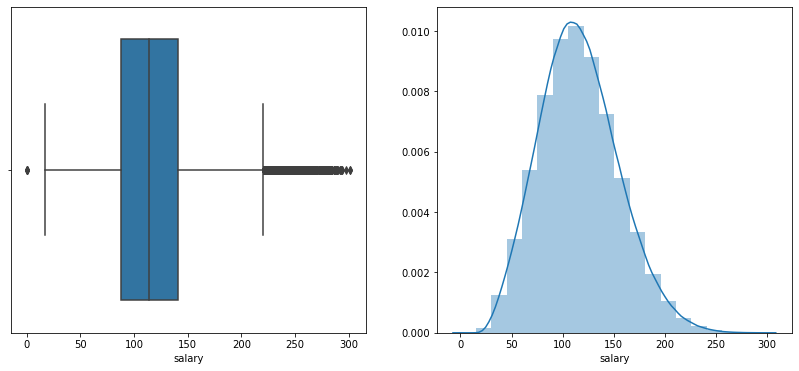

In [16]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(train_df.salary)

plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins = 20)

plt.show()

In [17]:
#Identify potential outliers
salary_stats = train_df.salary.describe()
print(salary_stats)

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64


In [18]:
train_df[train_df.salary == 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [19]:
IQR = salary_stats['75%'] - salary_stats['25%']
upper = salary_stats['75%'] + 1.5* IQR
lower = salary_stats['25%'] - 1.5* IQR
print('upper bound = ', upper )
print('lower bound = ', lower)

upper bound =  220.5
lower bound =  8.5


In [20]:
train_df = train_df[train_df.salary > 8.5]

In [21]:
train_df.loc[train_df.salary > upper,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [22]:
train_df[(train_df.salary > upper) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


Juniors who have a salary bigger than 222.5 seems like something reasonable due to Industry and Years of Experience.

### ---- 4 Explore the data (EDA) ----

In [23]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

def plot_feature(df , col):
    
    plt.figure(figsize = (14,6))
    
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64' :
        df[col].value_counts().sort_index().plot()
    else:
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace = True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    
    plt.subplot(1,2,2)
    
    if df[col].dtype == 'int64' or col == 'companyId':
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    plt.xticks(rotation = 45)
    plt.ylabel('Salaries')
    plt.show()
    
    
    

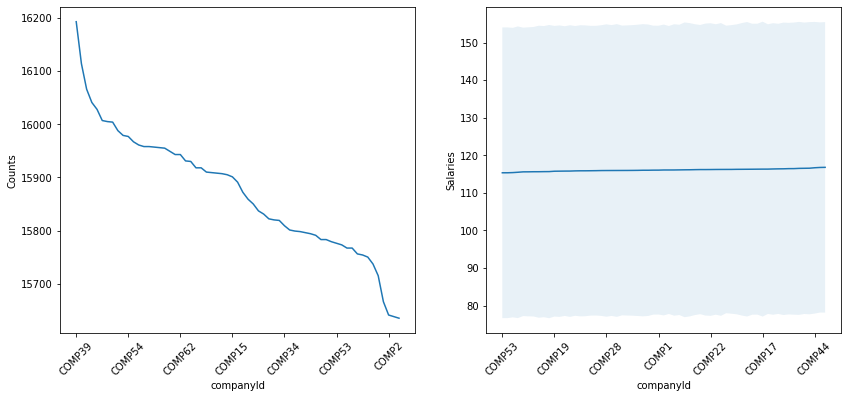

In [24]:
plot_feature(train_df, 'companyId')

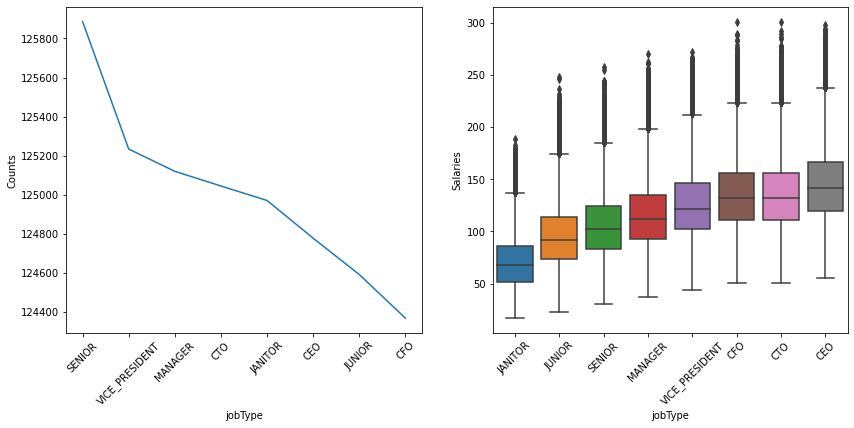

In [25]:
plot_feature(train_df, 'jobType')

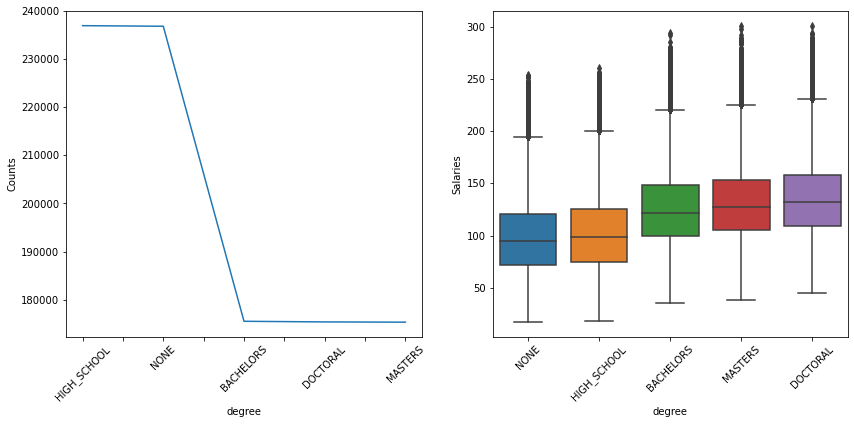

In [26]:
plot_feature(train_df, 'degree')

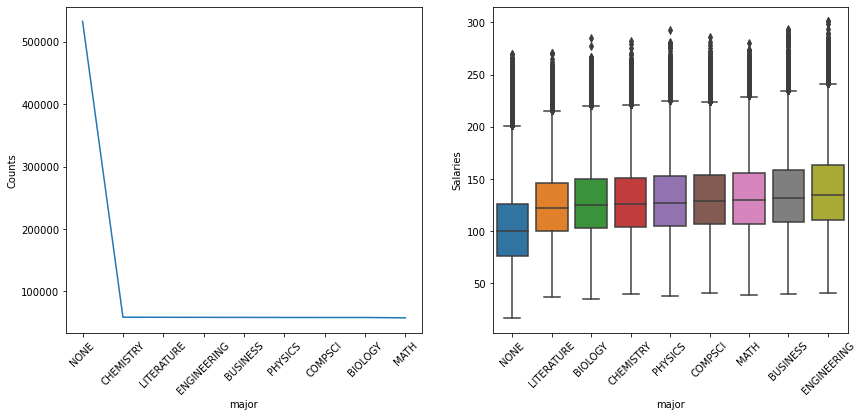

In [27]:
plot_feature(train_df, 'major')

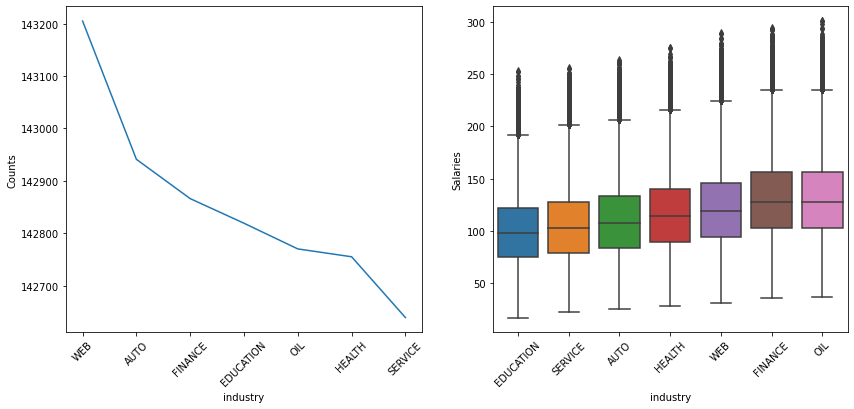

In [28]:
plot_feature(train_df, 'industry')

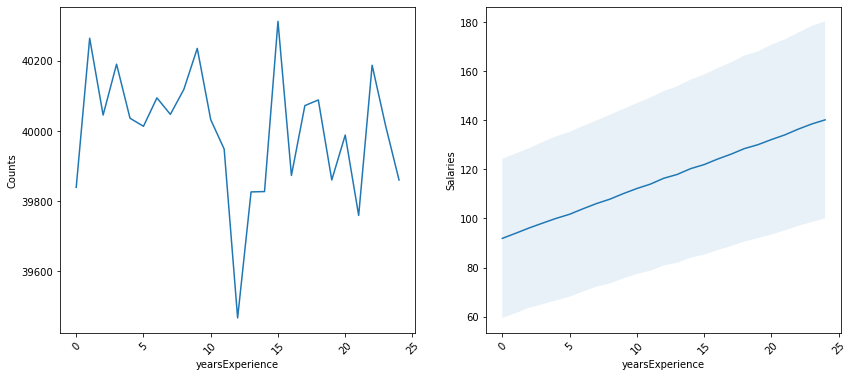

In [29]:
plot_feature(train_df, 'yearsExperience')

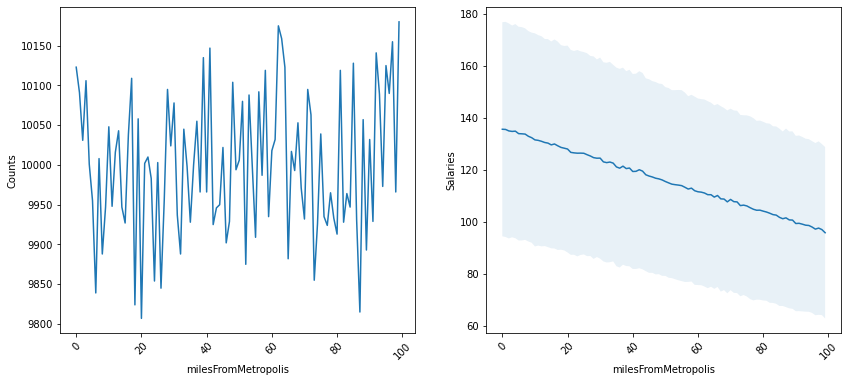

In [30]:
plot_feature(train_df, 'milesFromMetropolis')

Text(0.5, 1.0, 'Heatmap of correlation matrix')

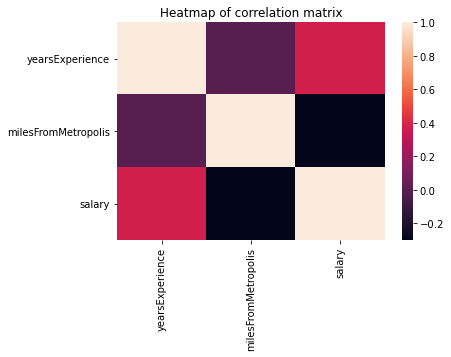

In [31]:
corr = train_df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)
plt.title('Heatmap of correlation matrix')

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   jobId                999995 non-null  object  
 1   companyId            999995 non-null  category
 2   jobType              999995 non-null  category
 3   degree               999995 non-null  category
 4   major                999995 non-null  category
 5   industry             999995 non-null  category
 6   yearsExperience      999995 non-null  int64   
 7   milesFromMetropolis  999995 non-null  int64   
 8   salary               999995 non-null  int64   
dtypes: category(5), int64(3), object(1)
memory usage: 82.9+ MB


In [33]:
#define variables
categorical_vars = ['companyId', 'jobType', 'degree', 'major', 'industry']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'

In [34]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
def encode_label(df, col):
    df[col]= label_encoder.fit_transform(df[col]) 

In [35]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)

In [36]:
test_features_df[categorical_vars] = test_features_df[categorical_vars].astype('category')

In [37]:
for col in test_features_df.columns:
    if test_features_df[col].dtype.name == "category":
        encode_label(test_features_df, col)

In [38]:
feature_df = train_df[categorical_vars + numeric_vars]
test_df = test_features_df[categorical_vars + numeric_vars]
target_df = train_df[target_var]

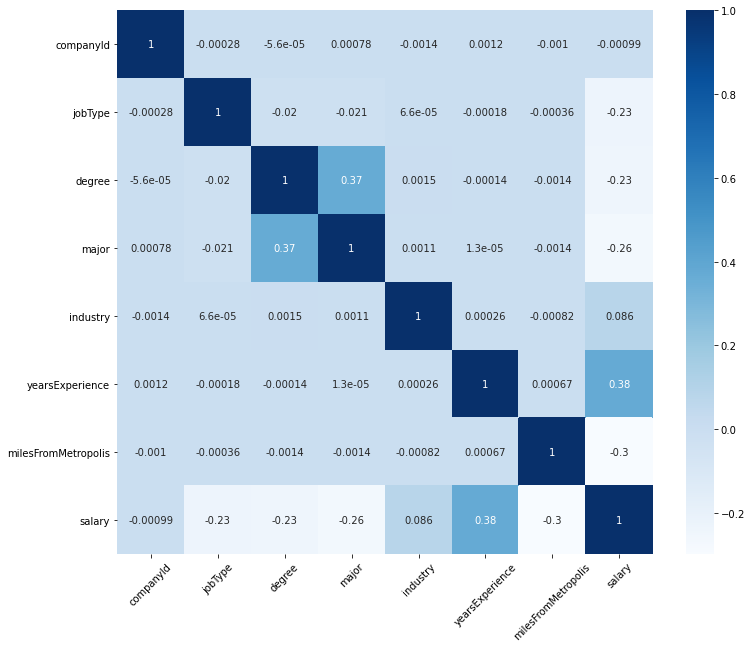

In [39]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

### ---- 5 Establish a baseline ----

In [40]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(feature_df, target_df)

LinearRegression()

In [41]:
some_feature = feature_df.iloc[:5]

In [42]:
some_target = target_df.iloc[:5]

In [43]:
print("Predictions:\t", lin_reg.predict(some_feature))

Predictions:	 [102.84948473 102.86365555  98.89644679 126.48897047 106.3473684 ]


In [44]:
 print("Labels:\t\t", list(some_target))

Labels:		 [130, 101, 137, 142, 163]


In [45]:
from sklearn.metrics import mean_squared_error
target_predictions = lin_reg.predict(feature_df)
lin_mse  = mean_squared_error(target_df, target_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

30.41554712874527

In [46]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, feature_df, target_df,
                            scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)

In [47]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [48]:
display_scores(lin_rmse_scores)

Scores: [30.44772881 30.42865753 30.47069666 30.42440166 30.30713789]
Mean: 30.415724511868103
Standard deviation: 0.05670947412458396


### ---- 6 Hypothesize solution ----

In [49]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(feature_df, target_df)

salary_predictions = tree_reg.predict(feature_df)
tree_mse = mean_squared_error(target_df, salary_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.4320313963863598

In [50]:
tree_scores = cross_val_score(tree_reg, feature_df, target_df,
                             scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)

In [51]:
 display_scores(tree_rmse_scores)

Scores: [27.58233066 27.53155089 27.52322431 27.50229786 27.48746551]
Mean: 27.525373845446307
Standard deviation: 0.03242344373303664


## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [52]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [53]:
#create and tune the models that you brainstormed during part 2

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [54]:
def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
    
def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

In [55]:
#initialize model list and dicts
models = []
mean_mse = {}
cv_std = {}
res = {}

#define number of processes to run in paralel
num_procs = 2

#shared model parameters
verbose_lvl = 0

#create models
lr = LinearRegression()
lr_std_pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())
rf = RandomForestRegressor(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=60, \
                           max_features=7, verbose=verbose_lvl)
gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=verbose_lvl)
                      
models.extend([lr, lr_std_pca, rf, gbm])

### ---- 9 Test models ----

In [56]:
#do 5-fold cross validation on models and measure MSE

print("Beginning cross validation")

for model in models:
    train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

Beginning cross validation

Model:
 LinearRegression()
Average MSE:
 925.122061439026
Standard deviation during CV:
 1.9379930470727231

Model:
 Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])
Average MSE:
 925.122061439026
Standard deviation during CV:
 1.9379930470727231

Model:
 RandomForestRegressor(max_depth=25, max_features=7, min_samples_split=60,
                      n_estimators=150, n_jobs=2)
Average MSE:
 378.5770948519587
Standard deviation during CV:
 1.2784394813212145

Model:
 GradientBoostingRegressor(max_depth=5, n_estimators=150)
Average MSE:
 357.90838887068844
Standard deviation during CV:
 0.9857137149020332


### ---- 10 Select best model  ----

In [57]:
#select the model with the lowest error as your "prodcuction" model

model = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model)


Predictions calculated using model with lowest MSE:
GradientBoostingRegressor(max_depth=5, n_estimators=150)


Gradient Boosting Regressor had a MSE <360

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [58]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

#train model on entire dataset
model.fit(feature_df, target_df)

#create predictions based on test data
predictions = model.predict(test_df)    

### ---- 12 Deploy solution ----

In [59]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

def save_results(model, mean_mse, predictions, feature_importances):
    '''saves model, model summary, feature importances, and predictions'''
    with open('model.txt', 'w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv')
    np.savetxt('predictions.csv', predictions, delimiter=',')
    
#store feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    #linear models don't have feature_importances_
    importances = [0]*len(feature_df.columns)
    

feature_importances = pd.DataFrame({'feature':feature_df.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

#save results
save_results(model, mean_mse[model], predictions, feature_importances)


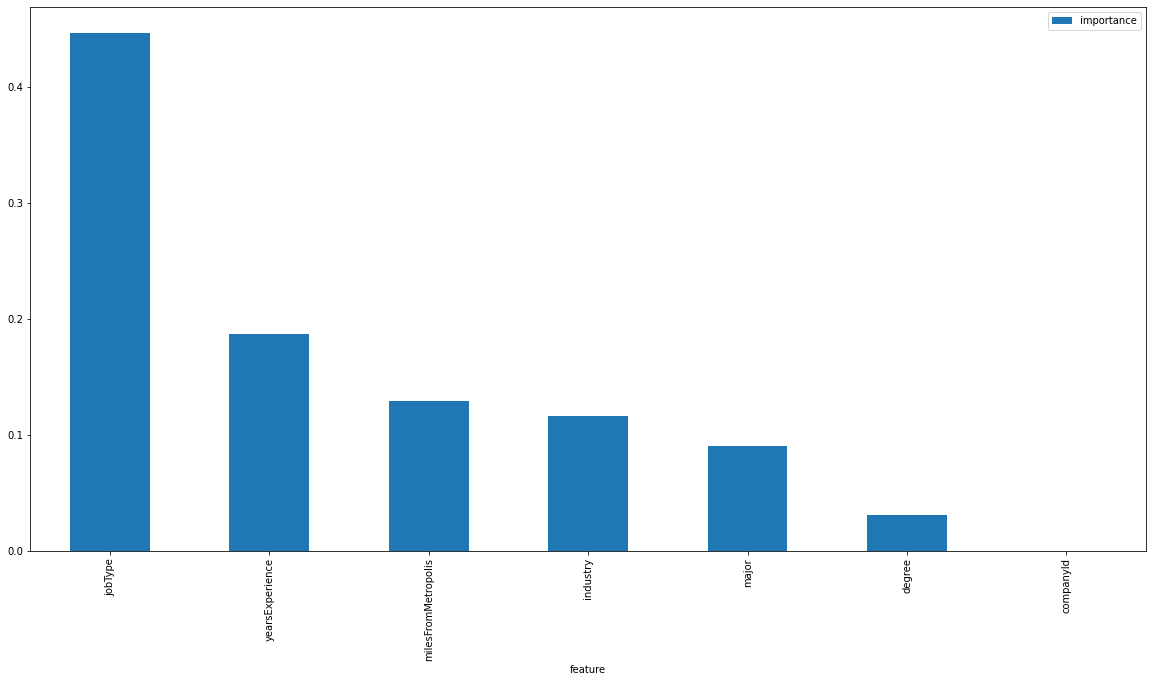

In [60]:
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.show()

In [62]:
!head predictions.csv

1.108695890532059849e+02
9.180119587825569738e+01
1.789878339022599789e+02
1.040086156051128938e+02
1.155842358937907761e+02
1.598946276070850843e+02
9.910331761955268348e+01
1.168954072935422204e+02
1.082932275990388860e+02
9.561961444544174071e+01


### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data